In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rantanplan import get_scansion
import pandas as pd
import re
import json
from tqdm.notebook import tqdm
import sklearn.metrics

In [3]:
df = pd.read_csv('evaluation-final.csv', sep=',')

In [4]:
df

,Stanza_text,ST_Correct,Title,Author,Year,Copyrighted
0,Al padre de la nación,None,Unknown,Anonymous,Unknown,NaN
1,Deletreos de armonía\nque ensaya inexperta mano.,None,Deletreos de armonía,"Machado, Antonio",1939,NaN
2,"El gato se subió a la mesa,\ncomió el pan y la...",None,Los últimos serán los primeros,"Letelier, Elías",-,Yes
3,"Flexiona la claridad su pie de apoyo,\nse posa...",None,Al alba,"Ratón, Maeve",-,Yes
4,"Desconfía del que ama: tiene hambre, \nno quie...",None,Consejo de Celestina,"Castellanos, Rosario",1974,Yes
...,...,...,...,...,...,...
454,"Y suele retornar, y me reintegra\nla fe que sa...",terceto_monorrimo,EL FANTASMA,"Díaz Mirón, Salvador",1928,NaN
455,"Bajo el ronco motín que grita muerte,\nel sagr...",terceto_monorrimo,EL PREDESTINADO,"Díaz Mirón, Salvador",1928,NaN
456,"Y aún ante indicio, de locura o dolo,\nno culp...",terceto_monorrimo,EL PREDESTINADO,"Díaz Mirón, Salvador",1928,NaN
457,Su fe suele medrar cuando vacila...\n¡Así la l...,terceto_monorrimo,EL PREDESTINADO,"Díaz Mirón, Salvador",1928,NaN


In [5]:
eval_dict = {}
for idx, stanza in tqdm(enumerate(df.Stanza_text)):
    try:
        eval_dict[idx] = {"rantanplan": get_scansion(stanza, rhyme_analysis=True)[0].get("structure"), "correct": str(df.ST_Correct[idx]), "text": stanza}
    except:
        print('#######', stanza)
        continue

set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
{'cantar'}
{'romance', 'cantar'}
{'romance', 'cantar'}
{'romance', 'cantar'}
{'romance', 'cantar'}
{'romance', 'cantar'}
{'romance', 'cantar'}
{'romance', 'cantar'}
{'cantar'}
{'romance', 'cantar'}
{'romance_arte_mayor', 'romance', 'cantar'}
{'seguidilla', 'cantar'}
{'romance', 'cantar'}
{'romance', 'cantar'}
{'seguidilla', 'cantar'}
{'chamberga'}
{'chamberga'}
set()
{'chamberga'}
set()
{'chamberga'}
{'chamberga'}
{'chamberga'}
{'chamberga'}
{'chamberga'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_arte_mayor', 'octava'}
{'copla_castellana', 'copla_arte_menor', 'octava'}
{'copla_castellana', 'copla_arte_menor', 'octava'}
{'copla_castellana', 'copl

{'sexteto'}
{'sexteto'}
{'sexteto'}
{'sexteto'}
{'sexteto'}
{'romance_arte_mayor', 'sexteto'}
{'sexteto'}
{'sexteto'}
{'sexteto'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sexteto_lira'}
{'sextilla'}
{'sextilla', 'sexteto'}
{'sextilla'}
{'sextilla'}
{'sextilla'}
{'sextilla'}
{'sextilla'}
{'sextilla'}
{'sextilla'}
{'sextilla'}
{'romance', 'sextilla'}
{'silva_arromanzada'}
{'silva_arromanzada'}
{'silva_arromanzada'}
set()
{'silva_arromanzada'}
set()
{'silva_arromanzada'}
{'silva_arromanzada'}
{'silva_arromanzada'}
{'silva_arromanzada'}
{'soleá'}
{'soleá'}
{'soleá'}
{'soleá'}
{'soleá'}
{'soleá'}
{'soleá'}
{'soleá'}
{'soleá'}
{'soleá'}
{'tercetillo'}
{'tercetillo', 'terceto', 'soleá'}
{'tercetillo', 'soleá'}
{'tercetillo', 'soleá'}
{'tercetillo'}
{'haiku', 'tercetillo'}
{'tercetillo'}
{'tercetillo', 'soleá'}
{'tercetillo', 'soleá'}
{'tercetillo', 'soleá'}
{'terceto'}
{'terceto'}

## Evaluation

In [6]:
out_evaluation = ["sonnet", "terceto_encadenado", "décima_antigua", "copla_mixta"]
dict_revision = {}
text, annotated_type, rantanplan_type = ([], [],[])
for value in eval_dict.values():
    if value["correct"] == "copla_mixta":
        continue
    annotated_type.append(value["correct"])
    if value["rantanplan"] is None or value["rantanplan"] in out_evaluation:
        value["rantanplan"] = 'None'
    rantanplan_type.append(value["rantanplan"])
    text.append(value["text"])
dict_revision.update({'text': text,'y_true': annotated_type, 'y_pred': rantanplan_type})

In [7]:
df_eval = pd.DataFrame.from_dict(dict_revision)

In [8]:
df_eval

,text,y_true,y_pred
0,Al padre de la nación,None,None
1,Deletreos de armonía\nque ensaya inexperta mano.,None,None
2,"El gato se subió a la mesa,\ncomió el pan y la...",None,None
3,"Flexiona la claridad su pie de apoyo,\nse posa...",None,None
4,"Desconfía del que ama: tiene hambre, \nno quie...",None,None
...,...,...,...
454,"Y suele retornar, y me reintegra\nla fe que sa...",terceto_monorrimo,terceto_monorrimo
455,"Bajo el ronco motín que grita muerte,\nel sagr...",terceto_monorrimo,terceto_monorrimo
456,"Y aún ante indicio, de locura o dolo,\nno culp...",terceto_monorrimo,terceto_monorrimo
457,Su fe suele medrar cuando vacila...\n¡Así la l...,terceto_monorrimo,terceto_monorrimo


In [9]:
precision,recall,f1,_ = sklearn.metrics.precision_recall_fscore_support(df_eval.y_true, df_eval.y_pred, average="macro", zero_division=0)
mcc = sklearn.metrics.matthews_corrcoef(df_eval.y_true, df_eval.y_pred)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("MCC :", mcc)

Precision:  0.9643995510662178
Recall:  0.9361822128488795
F1:  0.9450062652570603
MCC : 0.9362046780762158


In [13]:
precision,recall,f1,_ = sklearn.metrics.precision_recall_fscore_support(df_eval.y_true, df_eval.y_pred, average="macro", zero_division=0)
mcc = sklearn.metrics.matthews_corrcoef(df_eval.y_true, df_eval.y_pred)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("MCC :", mcc)

Precision:  0.9643995510662178
Recall:  0.9361822128488795
F1:  0.9450062652570603
MCC : 0.9362046780762158


In [11]:
accuracy = sklearn.metrics.accuracy_score(df_eval.y_true, df_eval.y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9368191721132898


In [10]:
precision,recall,f1,_ = sklearn.metrics.precision_recall_fscore_support(df_eval.y_true, df_eval.y_pred, average="micro", zero_division=0)
mcc = sklearn.metrics.matthews_corrcoef(df_eval.y_true, df_eval.y_pred)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("MCC :", mcc)

Precision:  0.9368191721132898
Recall:  0.9368191721132898
F1:  0.9368191721132898
MCC : 0.9362046780762158


In [12]:
sklearn.metrics.precision_recall_fscore_support(df_eval.y_true, df_eval.y_pred, average="micro", zero_division=0)

(0.9368191721132898, 0.9368191721132898, 0.9368191721132898, None)

In [13]:
conf_matrix = sklearn.metrics.confusion_matrix(df_eval.y_true, df_eval.y_pred,labels = sorted(df_eval.y_true.unique()))

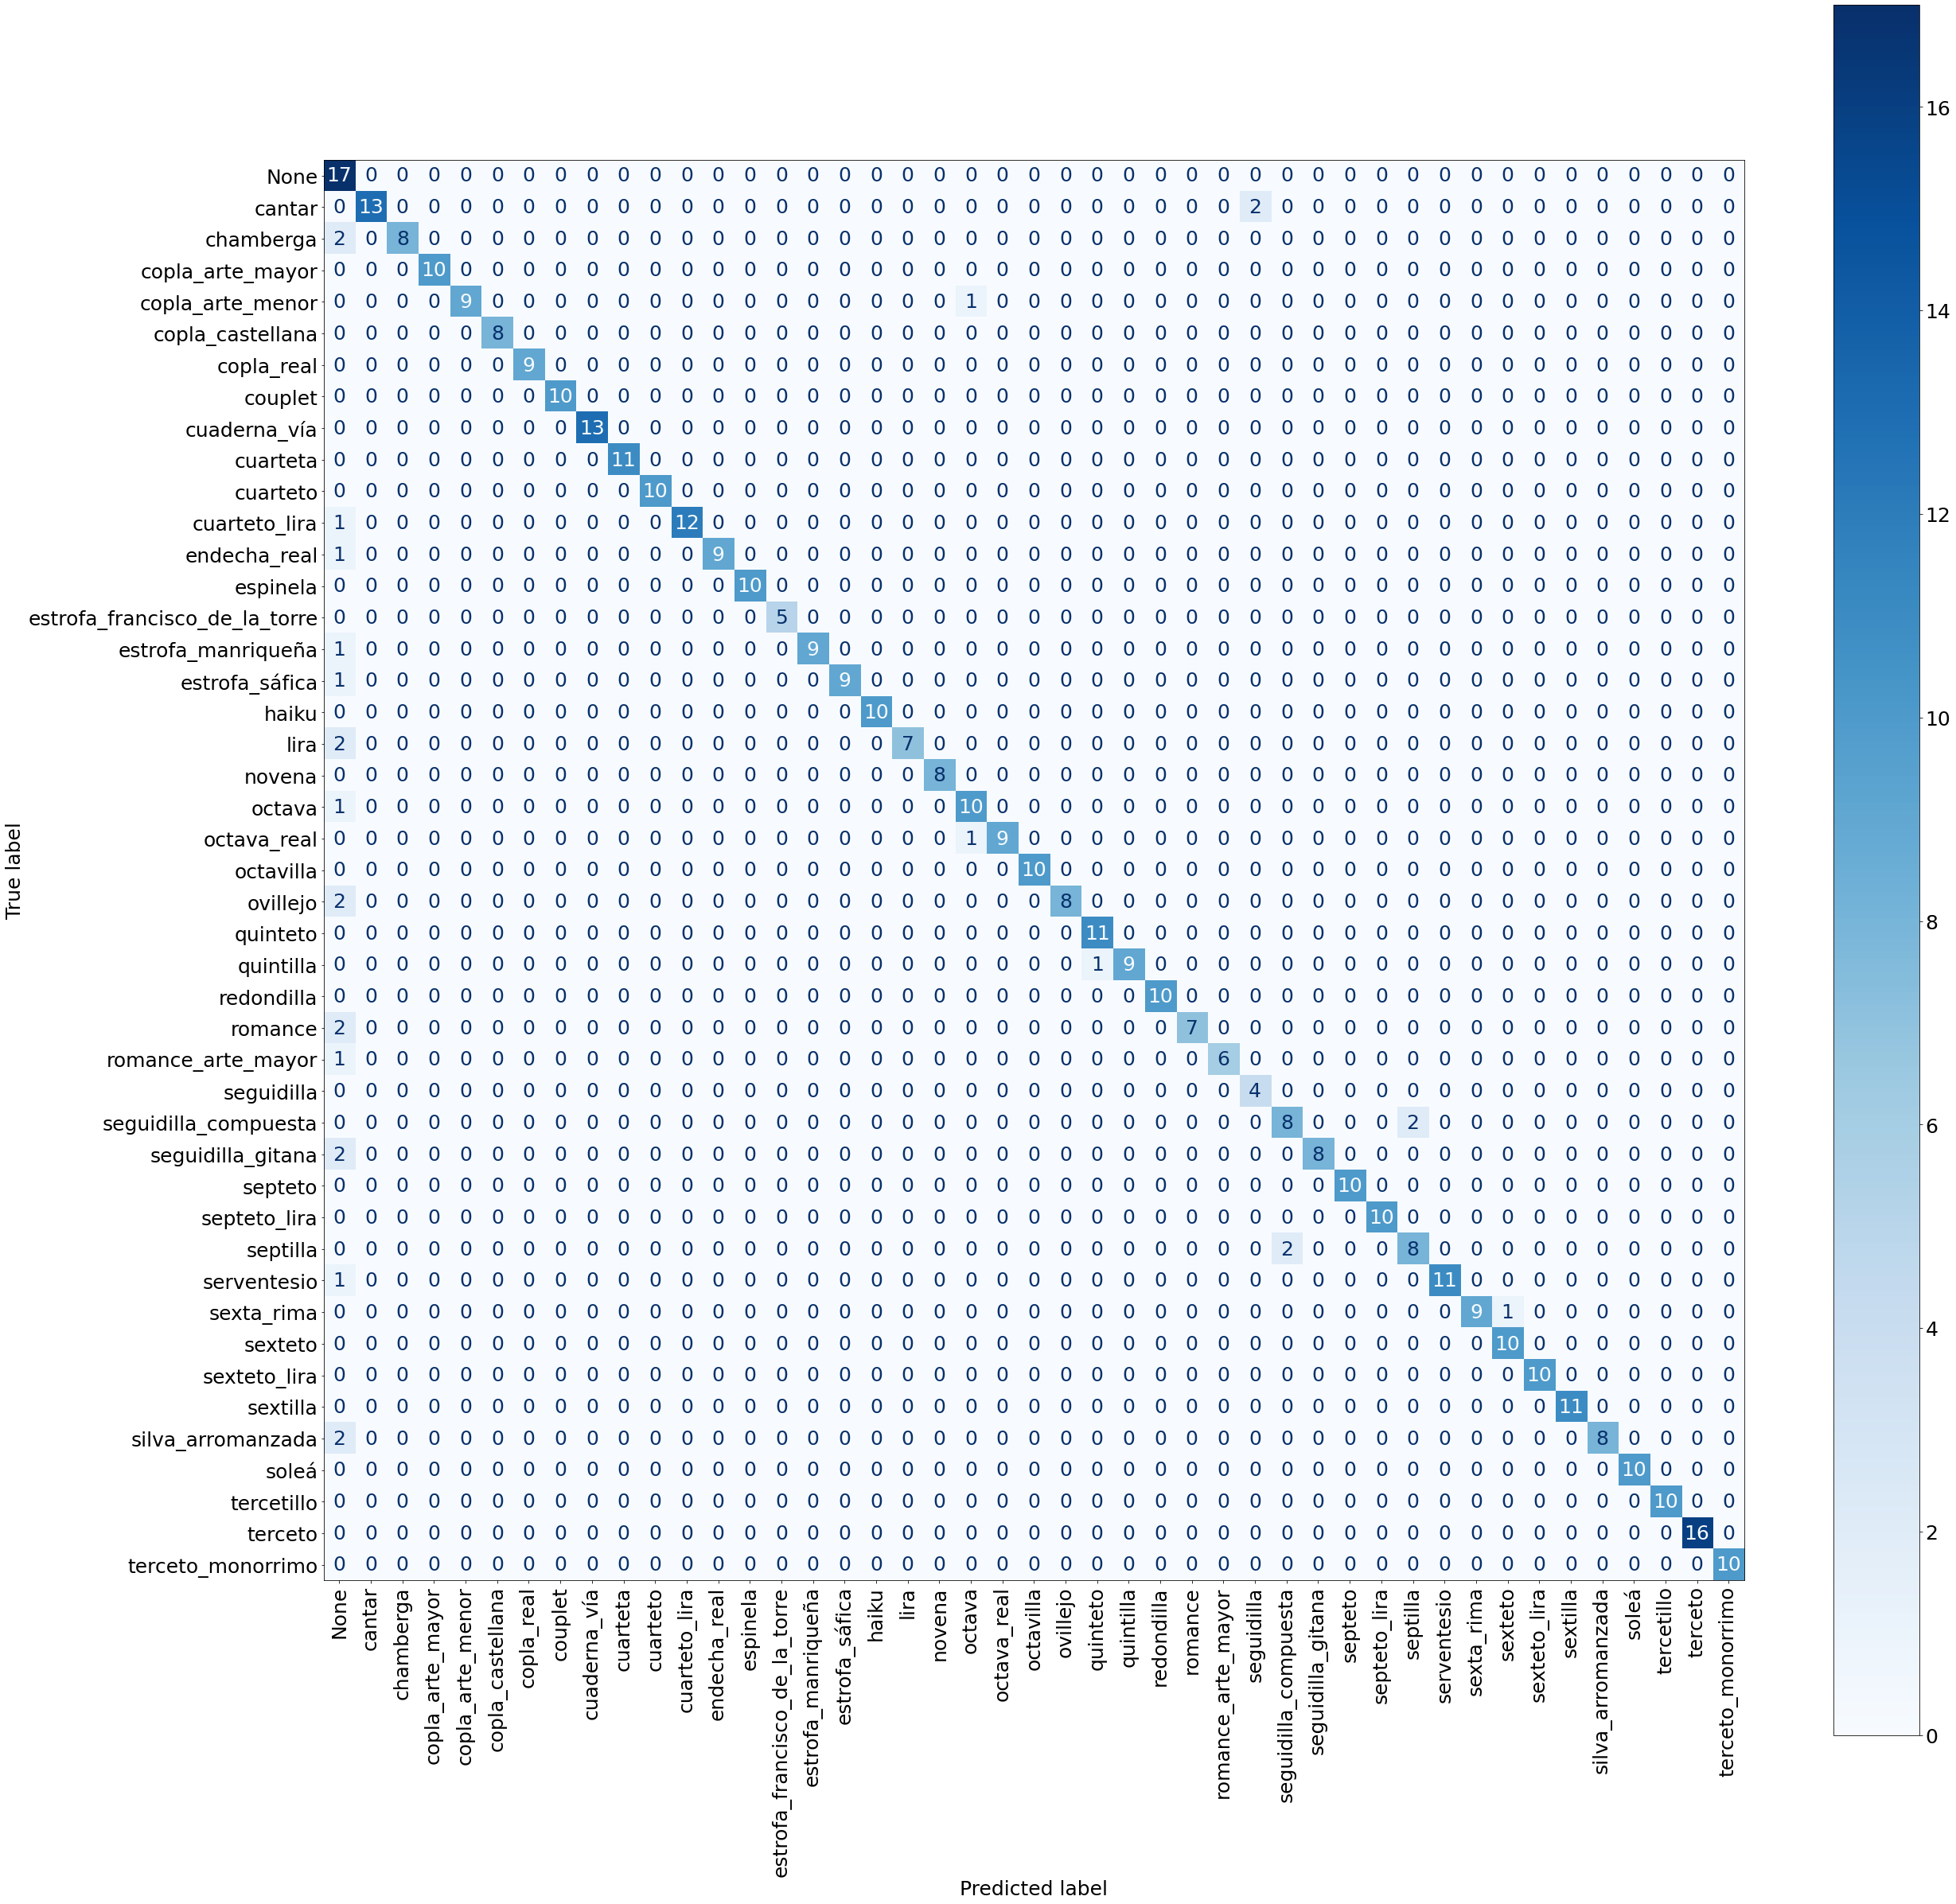

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams['font.size'] = 25
plt.rcParams["figure.figsize"] = (40,40)

display_labels = sorted(df_eval.y_true.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=display_labels)

disp = disp.plot(include_values=True, cmap='Blues', xticks_rotation='vertical')
plt.show()

In [76]:
annotated = dict_revision['y_true']
predicted = dict_revision['y_pred']

In [78]:
all_types = set(dict_revision['y_true'])

In [79]:
evaluation_dict = {}
for stanza_type in all_types:
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for idx, annotation in enumerate(annotated):
        # TP
        if stanza_type == annotation and stanza_type == predicted[idx]:
            tp += 1
        # FP
        if stanza_type != annotation and stanza_type == predicted[idx]:
            fp += 1
        # FN
        if stanza_type == annotation and stanza_type != predicted[idx]:
            fn += 1
        # TN
        if stanza_type != annotation and stanza_type != predicted[idx]:
            tn += 1
    if (fp == 0 and tp == 0):
        precision = 0
        recall = 0
        f1 = 0
    else:
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = 2*precision*recall/(precision+recall)
    evaluation_dict.update({stanza_type: {'precision': precision, 'recall': recall, 'f1': f1, 'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn}})

In [80]:
evaluation_dict

{'copla_castellana': {'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'tp': 8,
  'fp': 0,
  'fn': 0,
  'tn': 458},
 'septeto_lira': {'precision': 1.0,
  'recall': 0.9,
  'f1': 0.9473684210526316,
  'tp': 9,
  'fp': 0,
  'fn': 1,
  'tn': 456},
 'copla_arte_mayor': {'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'tp': 10,
  'fp': 0,
  'fn': 0,
  'tn': 456},
 'endecha_real': {'precision': 1.0,
  'recall': 0.1,
  'f1': 0.18181818181818182,
  'tp': 1,
  'fp': 0,
  'fn': 9,
  'tn': 456},
 'haiku': {'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'tp': 10,
  'fp': 0,
  'fn': 0,
  'tn': 456},
 'novena': {'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'tp': 8,
  'fp': 0,
  'fn': 0,
  'tn': 458},
 'quinteto': {'precision': 0.9166666666666666,
  'recall': 1.0,
  'f1': 0.9565217391304348,
  'tp': 11,
  'fp': 1,
  'fn': 0,
  'tn': 454},
 'chamberga': {'precision': 1.0,
  'recall': 0.6,
  'f1': 0.7499999999999999,
  'tp': 6,
  'fp': 0,
  'fn': 4,
  'tn': 456},
 'silva_arromanzada': {'preci

## Testing

In [33]:
error_count

29

In [52]:
error_count = 0
for idx, item in enumerate(dict_revision["y_pred"]):
    annotation = dict_revision["y_true"][idx]
    if item != annotation:
        print(annotation)
        get_scansion(dict_revision["text"][idx], rhyme_analysis=True)
    
        break
    if item != annotation:
        error_count += 1

cantar
{'cantar', 'seguidilla'}
[{'tokens': [{'symbol': '—'}, {'symbol': '¿'}, {'word': [{'syllable': 'Sa', 'is_stressed': False}, {'syllable': 'bre', 'is_stressed': True}, {'syllable': 'mos', 'is_stressed': False, 'is_word_end': True}], 'stress_position': -2}, {'word': [{'syllable': 'no', 'is_stressed': False}, {'syllable': 'so', 'is_stressed': True}, {'syllable': 'tros', 'is_stressed': False, 'is_word_end': True}], 'stress_position': -2}, {'symbol': ','}, {'word': [{'syllable': 'vi', 'is_stressed': True}, {'syllable': 'vos', 'is_stressed': False, 'is_word_end': True}], 'stress_position': -2}, {'symbol': ','}], 'phonological_groups': [{'syllable': 'Sa', 'is_stressed': False}, {'syllable': 'bre', 'is_stressed': True}, {'syllable': 'mos', 'is_stressed': False, 'is_word_end': True}, {'syllable': 'no', 'is_stressed': False}, {'syllable': 'so', 'is_stressed': True}, {'syllable': 'tros', 'is_stressed': False, 'is_word_end': True}, {'syllable': 'vi', 'is_stressed': True}, {'syllable': 'vos',

In [14]:
error_count = 0
for idx, item in enumerate(dict_revision["y_pred"]):
    annotation = dict_revision["y_true"][idx]
    if item != annotation and annotation == 'sextilla':
        print("annotated: ", dict_revision["y_true"][idx], " detected: ", item)
        print('-------------------------')
        print(dict_revision["text"][idx])
        print('##########################')
    if item != annotation:
        error_count += 1

annotated:  sextilla  detected:  estrofa_manriqueña
-------------------------
Partimos cuando nacemos,    
andamos mientras vivimos,     
y llegamos     
al tiempo que fenecemos,     
así que cuando morimos,     
Descansamos.
##########################
annotated:  sextilla  detected:  estrofa_manriqueña
-------------------------
Ve, discreto mensagero,
delante aquella figura
valerosa
por quien peno, por quien muero,
flor de toda hermosura,
tan preciosa
##########################
annotated:  sextilla  detected:  estrofa_manriqueña
-------------------------
Nuestras vidas son los ríos
que van a dar en la mar,
que es el morir:
allí van los señoríos,
derechos a se acabar
y consumir;
##########################
annotated:  sextilla  detected:  estrofa_manriqueña
-------------------------
Partimos cuando nacemos,
andamos mientras vivimos,
y llegamos-
al tiempo que fenecemos,
así que cuando morimos,
descansamos.
##########################


In [1]:
%load_ext autoreload
%autoreload 2
from rantanplan import get_scansion

In [18]:
poem = """tras tanta confusión, tras pena tanta?
¿De qué sirve la argolla a la garganta
"""

In [20]:
get_scansion(poem, rhyme_analysis=True)

19


[{'tokens': [{'word': [{'syllable': 'tras',
      'is_stressed': False,
      'is_word_end': True}],
    'stress_position': 0},
   {'word': [{'syllable': 'tan', 'is_stressed': True},
     {'syllable': 'ta', 'is_stressed': False, 'is_word_end': True}],
    'stress_position': -2},
   {'word': [{'syllable': 'con', 'is_stressed': False},
     {'syllable': 'fu', 'is_stressed': False},
     {'syllable': 'sión', 'is_stressed': True, 'is_word_end': True}],
    'stress_position': -1},
   {'symbol': ','},
   {'word': [{'syllable': 'tras', 'is_stressed': False, 'is_word_end': True}],
    'stress_position': 0},
   {'word': [{'syllable': 'pe', 'is_stressed': True},
     {'syllable': 'na', 'is_stressed': False, 'is_word_end': True}],
    'stress_position': -2},
   {'word': [{'syllable': 'tan', 'is_stressed': True},
     {'syllable': 'ta', 'is_stressed': False, 'is_word_end': True}],
    'stress_position': -2},
   {'symbol': '?'}],
  'phonological_groups': [{'syllable': 'tras',
    'is_stressed': Fal

## Escribir a xls

In [32]:
writer = pd.ExcelWriter('tmp/output.xlsx')
df.to_excel(writer)
writer.save()

In [38]:
Truedf2 = pd.DataFrame.from_dict(dict_revision)
writer = pd.ExcelWriter('tmp/output.xlsx')
df2.to_excel(writer)
writer.save()

## Test ADSO 100

In [30]:
!averell download 4 --corpora-folder tmp/corpora

100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 4514.86it/s]
INFO:root:Downloaded ADSO 100 poems corpus corpus


In [32]:
!averell export 4 --granularity line --corpora-folder tmp/corpora

Using corpora folder: 'tmp/corpora'


In [20]:
with open('tmp/corpora/line.json', 'r') as json_file:
    parsed_json = (json.loads(json_file.read()))

In [79]:
eval_adso = {}
eval_lines = []
eval_pattern = []
rantanplan_pattern = []
for line in parsed_json:
    line_adso = line['line_text']
    adso_pattern = line['metrical_pattern']
    eval_lines.append(line_adso)
    eval_pattern.append(adso_pattern)
    rantanplan_pattern.append(get_scansion(line_adso, rhythmical_lengths=[11])[0]["rhythm"]["stress"])
eval_adso.update({'text': eval_lines, 'y_true': eval_pattern, 'y_pred': rantanplan_pattern})

In [80]:
df_eval_adso = pd.DataFrame.from_dict(eval_adso)

In [127]:
rantanplan_adso = eval_adso['y_pred']
adso = eval_adso['y_true']
rantanplan_adso_stress = [line for line in rantanplan_adso]
accuracy_rantanplan_adso = sum(rantanplan_adso == df_eval_adso.y_true) / len(adso)
print(f"Rantanplan on ADSO: {accuracy_rantanplan_adso:.4f}")

Rantanplan on ADSO: 0.9687


In [128]:
accuracy = sklearn.metrics.accuracy_score(df_eval_adso.y_true, df_eval_adso.y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9686609686609686


In [12]:
from rantanplan.core import syllabify

In [13]:
syllabify("enrear")

(['en', 're', 'ar'], ())